In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
Y = data['Price']
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']], dtype='float')

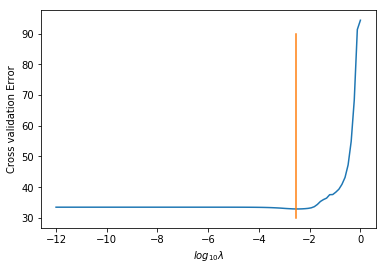

In [4]:
def mse(y_a, y_b):
    d = (y_a - y_b)**2
    return d.mean()


def cross_validation(X, Y, N=100):
    alpha = np.logspace(-12,0,N)
    mse_g = np.zeros(N)
    beta = np.zeros((14,N))
    l = LeaveOneOut()
    for i in range(N):
        j=0
        ms = np.zeros(len(Y))
        for train_index, test_index in l.split(X,Y):
            x_train = X[train_index,:]
            x_test = X[test_index,:]

            y_train = Y[train_index]
            y_test = Y[test_index]
            
            linear = linear_model.Lasso(alpha[i], normalize=True)
            linear.fit(x_train, y_train)
            beta[0,i] = linear.intercept_
            beta[1:,i] = linear.coef_
            Y_model = linear.predict(x_test)
            ms[j] = mse(Y_model, y_test)
            j += 1
        mse_g[i] = ms.mean()
    plt.plot(np.log10(alpha), mse_g)
    gr = np.ones(N)*np.log10(alpha[np.argmin(mse_g)])
    gr_ = np.linspace(30,90,100)
    plt.plot(gr,gr_)
    plt.xlabel("$log_{10} \lambda$")
    plt.ylabel("Cross validation Error")
    plt.show()

    return beta, alpha, mse_g

beta, alpha, mse_g = cross_validation(X,Y,100)

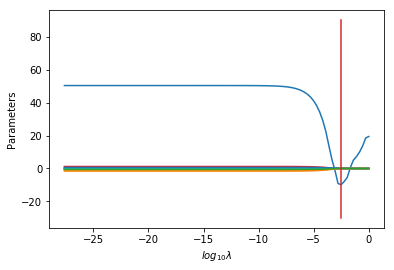

In [5]:
for i in range(13):
    plt.plot(np.log(alpha), beta[i,:], label=str(i))
gr = np.ones(100)*np.log10(alpha[np.argmin(mse_g)])
gr_ = np.linspace(-30,90,100)
plt.plot(gr,gr_)
plt.xlabel("$log_{10} \lambda$")
plt.ylabel("Parameters")
plt.show()

Se puede evidenciar que en el lambda mas pequeño el parametro 0 es de lo que mas tienen influencia